1. Data Loading and Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Import custom utilities with error handling
import sys
import os
sys.path.append('../')

try:
    from src.utils import load_config, setup_logging
    print("✅ Successfully imported custom utilities")
except ImportError as e:
    print(f"⚠️  Import error: {e}")
    print("Using fallback configuration...")
    
    # Fallback configuration with YOUR correct file path
    def load_config():
        return {
            'data': {
                'raw_file': 'data/raw/Customer_Churn_Prediction_Dataset.csv',  # ← Fixed this
                'target_column': 'Churn'
            }
        }
    
    def setup_logging():
        import logging
        logging.basicConfig(level=logging.INFO)
        print("Basic logging setup complete")

# Setup
config = load_config()
setup_logging()

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("📊 Data Exploration Environment Setup Complete!")

# Load the dataset
data_path = config['data']['raw_file']
print(f"Loading data from: {data_path}")

# Check if file exists with full path for debugging
full_path = os.path.abspath(data_path)
print(f"Full path: {full_path}")

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"📐 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
else:
    print(f"❌ Data file not found at: {data_path}")
    print(f"❌ Full path checked: {full_path}")
    
    # Try alternative paths
    alternative_paths = [
        '../data/raw/Customer_Churn_Prediction_Dataset.csv',
        'data/raw/Customer_Churn_Prediction_Dataset.csv',
        'Customer_Churn_Prediction_Dataset.csv'
    ]
    
    print("🔍 Trying alternative paths...")
    for alt_path in alternative_paths:
        if os.path.exists(alt_path):
            print(f"✅ Found data file at: {alt_path}")
            df = pd.read_csv(alt_path)
            print(f"📐 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
            break
    else:
        print("❌ Could not find data file in any expected location")
        print("Please ensure your data file is in the correct location")

2025-09-24 18:37:52,471 - src - INFO - Successfully imported utils module
2025-09-24 18:37:52,511 - src - INFO - Customer Churn Causal Analysis package v1.0.0 loaded successfully
✅ Successfully imported custom utilities
2025-09-24 18:37:52,533 - root - INFO - Configuration loaded from r:\Customer Churn Prediction with Casual Analysis\notebooks\..\config\params.yaml
18:37:52 - INFO - Logging configured successfully
📊 Data Exploration Environment Setup Complete!
Loading data from: data/raw/Customer_Churn_Prediction_Dataset.csv
Full path: r:\Customer Churn Prediction with Casual Analysis\notebooks\data\raw\Customer_Churn_Prediction_Dataset.csv
❌ Data file not found at: data/raw/Customer_Churn_Prediction_Dataset.csv
❌ Full path checked: r:\Customer Churn Prediction with Casual Analysis\notebooks\data\raw\Customer_Churn_Prediction_Dataset.csv
🔍 Trying alternative paths...
✅ Found data file at: ../data/raw/Customer_Churn_Prediction_Dataset.csv
📐 Shape: 7,043 rows × 21 columns


2. Dataset Overview

In [2]:
print("📋 DATASET INFORMATION")
print("=" * 50)
df.info()

print("\n📊 BASIC STATISTICS")
print("=" * 50)
print(f"Total customers: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("👀 FIRST 5 ROWS")
print("=" * 50)
display(df.head())

print("\n🏷️ COLUMN NAMES")
print("=" * 50)
print(df.columns.tolist())

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



🏷️ COLUMN NAMES
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


3. Data Quality Assessment

In [3]:
# Missing values analysis
print("❌ MISSING VALUES ANALYSIS")
print("=" * 50)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if missing_df.empty:
    print("✅ No missing values found!")
else:
    display(missing_df)
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

# Data types analysis
print("\n🏷️ DATA TYPES ANALYSIS")
print("=" * 50)
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ['Column', 'Data_Type']
dtype_df['Unique_Values'] = [df[col].nunique() for col in df.columns]
dtype_df['Sample_Values'] = [df[col].dropna().iloc[:3].tolist() if len(df[col].dropna()) > 0 else [] for col in df.columns]
display(dtype_df)

print("\n📊 SUMMARY BY DATA TYPE")
print("=" * 30)
print(dtype_df['Data_Type'].value_counts())


# Identify potential issues
print("\n🚨 POTENTIAL DATA ISSUES")
print("=" * 50)
issues = []

# Check for mixed data types
for col in df.select_dtypes(include=['object']).columns:
    sample_values = df[col].dropna().iloc[:100]
    numeric_count = sum([str(val).replace('.', '').replace('-', '').isdigit() for val in sample_values])
    if numeric_count > len(sample_values) * 0.8:
        issues.append(f"'{col}' might be numeric but stored as object")

# Check for high cardinality
for col in df.select_dtypes(include=['object']).columns:
    unique_ratio = df[col].nunique() / len(df)
    if unique_ratio > 0.5:
        issues.append(f"'{col}' has high cardinality ({df[col].nunique()} unique values)")

if issues:
    for issue in issues:
        print(f"⚠️  {issue}")
else:
    print("✅ No obvious data quality issues detected")

❌ MISSING VALUES ANALYSIS
✅ No missing values found!

🏷️ DATA TYPES ANALYSIS


,Column,Data_Type,Unique_Values,Sample_Values
0,customerID,object,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK]"
1,gender,object,2,"[Female, Male, Male]"
2,SeniorCitizen,int64,2,"[0, 0, 0]"
3,Partner,object,2,"[Yes, No, No]"
4,Dependents,object,2,"[No, No, No]"
5,tenure,int64,73,"[1, 34, 2]"
6,PhoneService,object,2,"[No, Yes, Yes]"
7,MultipleLines,object,3,"[No phone service, No, No]"
8,InternetService,object,3,"[DSL, DSL, DSL]"
9,OnlineSecurity,object,3,"[No, Yes, Yes]"



📊 SUMMARY BY DATA TYPE
object     18
int64       2
float64     1
Name: Data_Type, dtype: int64

🚨 POTENTIAL DATA ISSUES
⚠️  'TotalCharges' might be numeric but stored as object
⚠️  'customerID' has high cardinality (7043 unique values)
⚠️  'TotalCharges' has high cardinality (6531 unique values)


4. Target Variable Analysis

🎯 TARGET VARIABLE: Churn
Target distribution:
  No: 5,174 (73.5%)
  Yes: 1,869 (26.5%)

📈 Overall Churn Rate: 26.5%


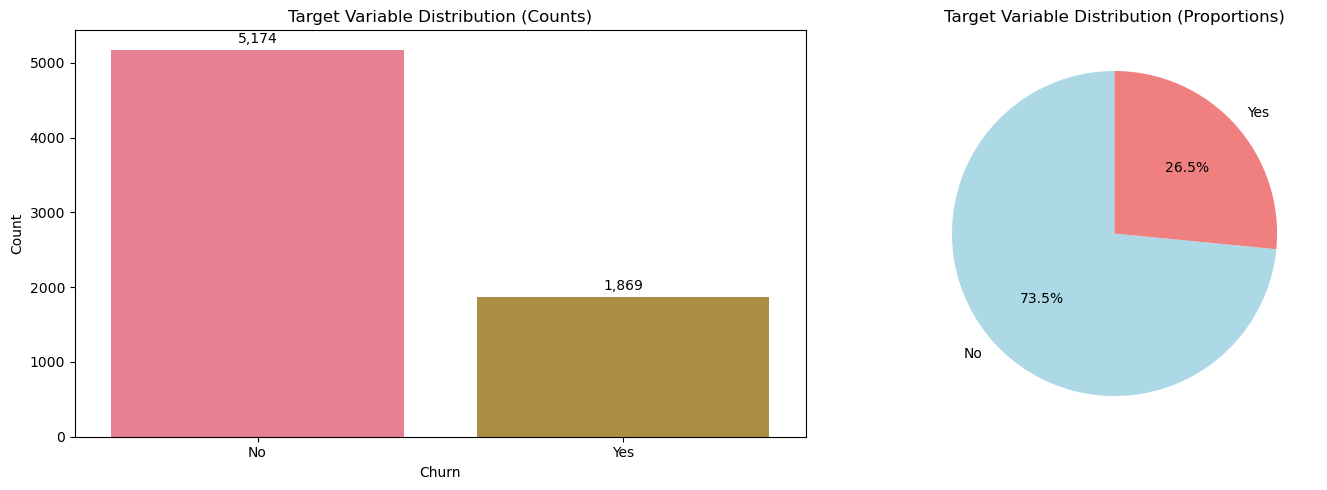

In [4]:
target_col = config['data']['target_column']
print(f"🎯 TARGET VARIABLE: {target_col}")
print("=" * 50)

if target_col in df.columns:
    target_counts = df[target_col].value_counts()
    target_props = df[target_col].value_counts(normalize=True)
    
    print(f"Target distribution:")
    for val, count in target_counts.items():
        prop = target_props[val]
        print(f"  {val}: {count:,} ({prop:.1%})")
    
    # Calculate churn rate
    churn_rate = target_props.get('Yes', 0) * 100
    print(f"\n📈 Overall Churn Rate: {churn_rate:.1f}%")
    
    # Visualize target distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Count plot
    sns.countplot(data=df, x=target_col, ax=ax1)
    ax1.set_title('Target Variable Distribution (Counts)')
    ax1.set_ylabel('Count')
    for i, v in enumerate(target_counts.values):
        ax1.text(i, v + 50, f'{v:,}', ha='center', va='bottom')
    
    # Pie chart
    colors = ['lightblue', 'lightcoral']
    ax2.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Target Variable Distribution (Proportions)')
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Target column '{target_col}' not found in dataset")

5. Numerical Features Analysis

🔢 NUMERICAL FEATURES (3)
['SeniorCitizen', 'tenure', 'MonthlyCharges']

📊 DESCRIPTIVE STATISTICS


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


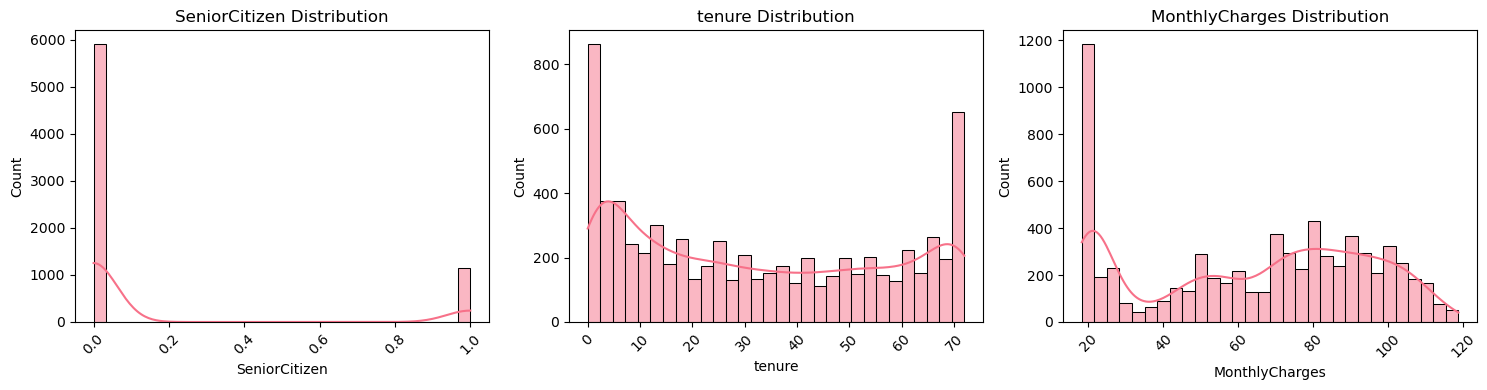

🔗 CORRELATION ANALYSIS


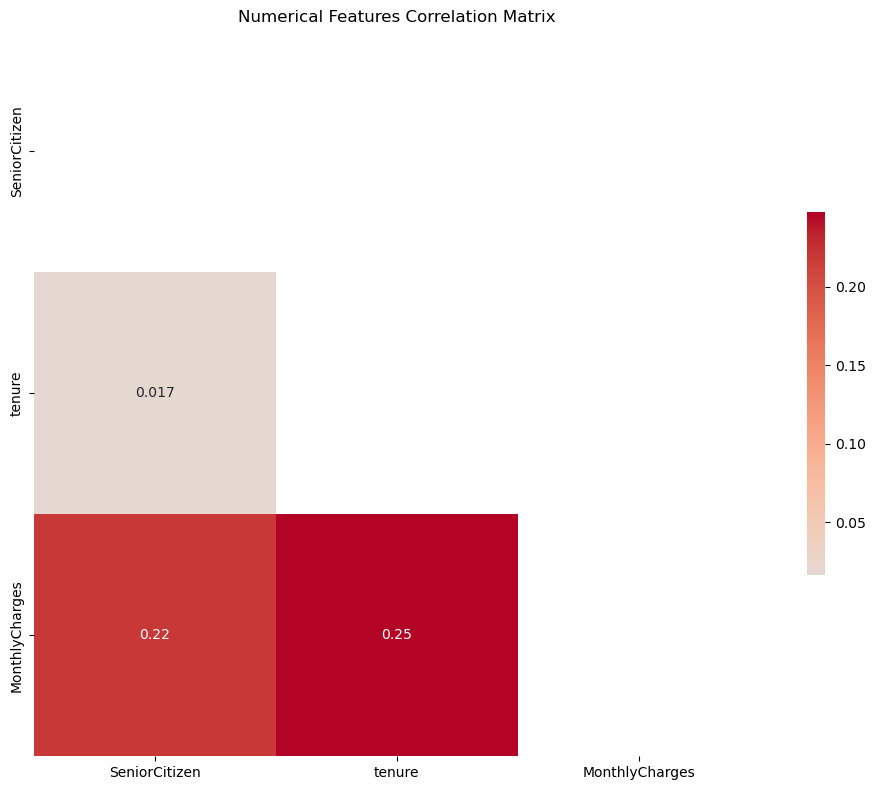


✅ No high correlations (>0.7) found


In [5]:
# Identify numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"🔢 NUMERICAL FEATURES ({len(numeric_columns)})")
print("=" * 50)
print(numeric_columns)

if numeric_columns:
    # Descriptive statistics
    print("\n📊 DESCRIPTIVE STATISTICS")
    print("=" * 50)
    display(df[numeric_columns].describe())
    
    # Visualize distributions
    n_cols = min(3, len(numeric_columns))
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, col in enumerate(numeric_columns):
        if i < len(axes):
            sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
            axes[i].set_title(f'{col} Distribution')
            axes[i].tick_params(axis='x', rotation=45)
    
    for i in range(len(numeric_columns), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout()
    plt.show()

# Correlation analysis
if len(numeric_columns) > 1:
    print("🔗 CORRELATION ANALYSIS")
    print("=" * 50)
    correlation_matrix = df[numeric_columns].corr()
    
    # Heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.5})
    plt.title('Numerical Features Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Find high correlations
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
    
    if high_corr_pairs:
        print("\n🚨 HIGH CORRELATIONS (>0.7):")
        for col1, col2, corr in high_corr_pairs:
            print(f"  {col1} ↔ {col2}: {corr:.3f}")
    else:
        print("\n✅ No high correlations (>0.7) found")

6. 📝 Categorical Features Analysis

📝 CATEGORICAL FEATURES (17)
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


,Feature,Unique_Values,Most_Frequent,Most_Frequent_Count,Most_Frequent_Pct
0,customerID,7043,0002-ORFBO,1,0.0%
1,gender,2,Male,3555,50.5%
2,Partner,2,No,3641,51.7%
3,Dependents,2,No,4933,70.0%
4,PhoneService,2,Yes,6361,90.3%
5,MultipleLines,3,No,3390,48.1%
6,InternetService,3,Fiber optic,3096,44.0%
7,OnlineSecurity,3,No,3498,49.7%
8,OnlineBackup,3,No,3088,43.8%
9,DeviceProtection,3,No,3095,43.9%


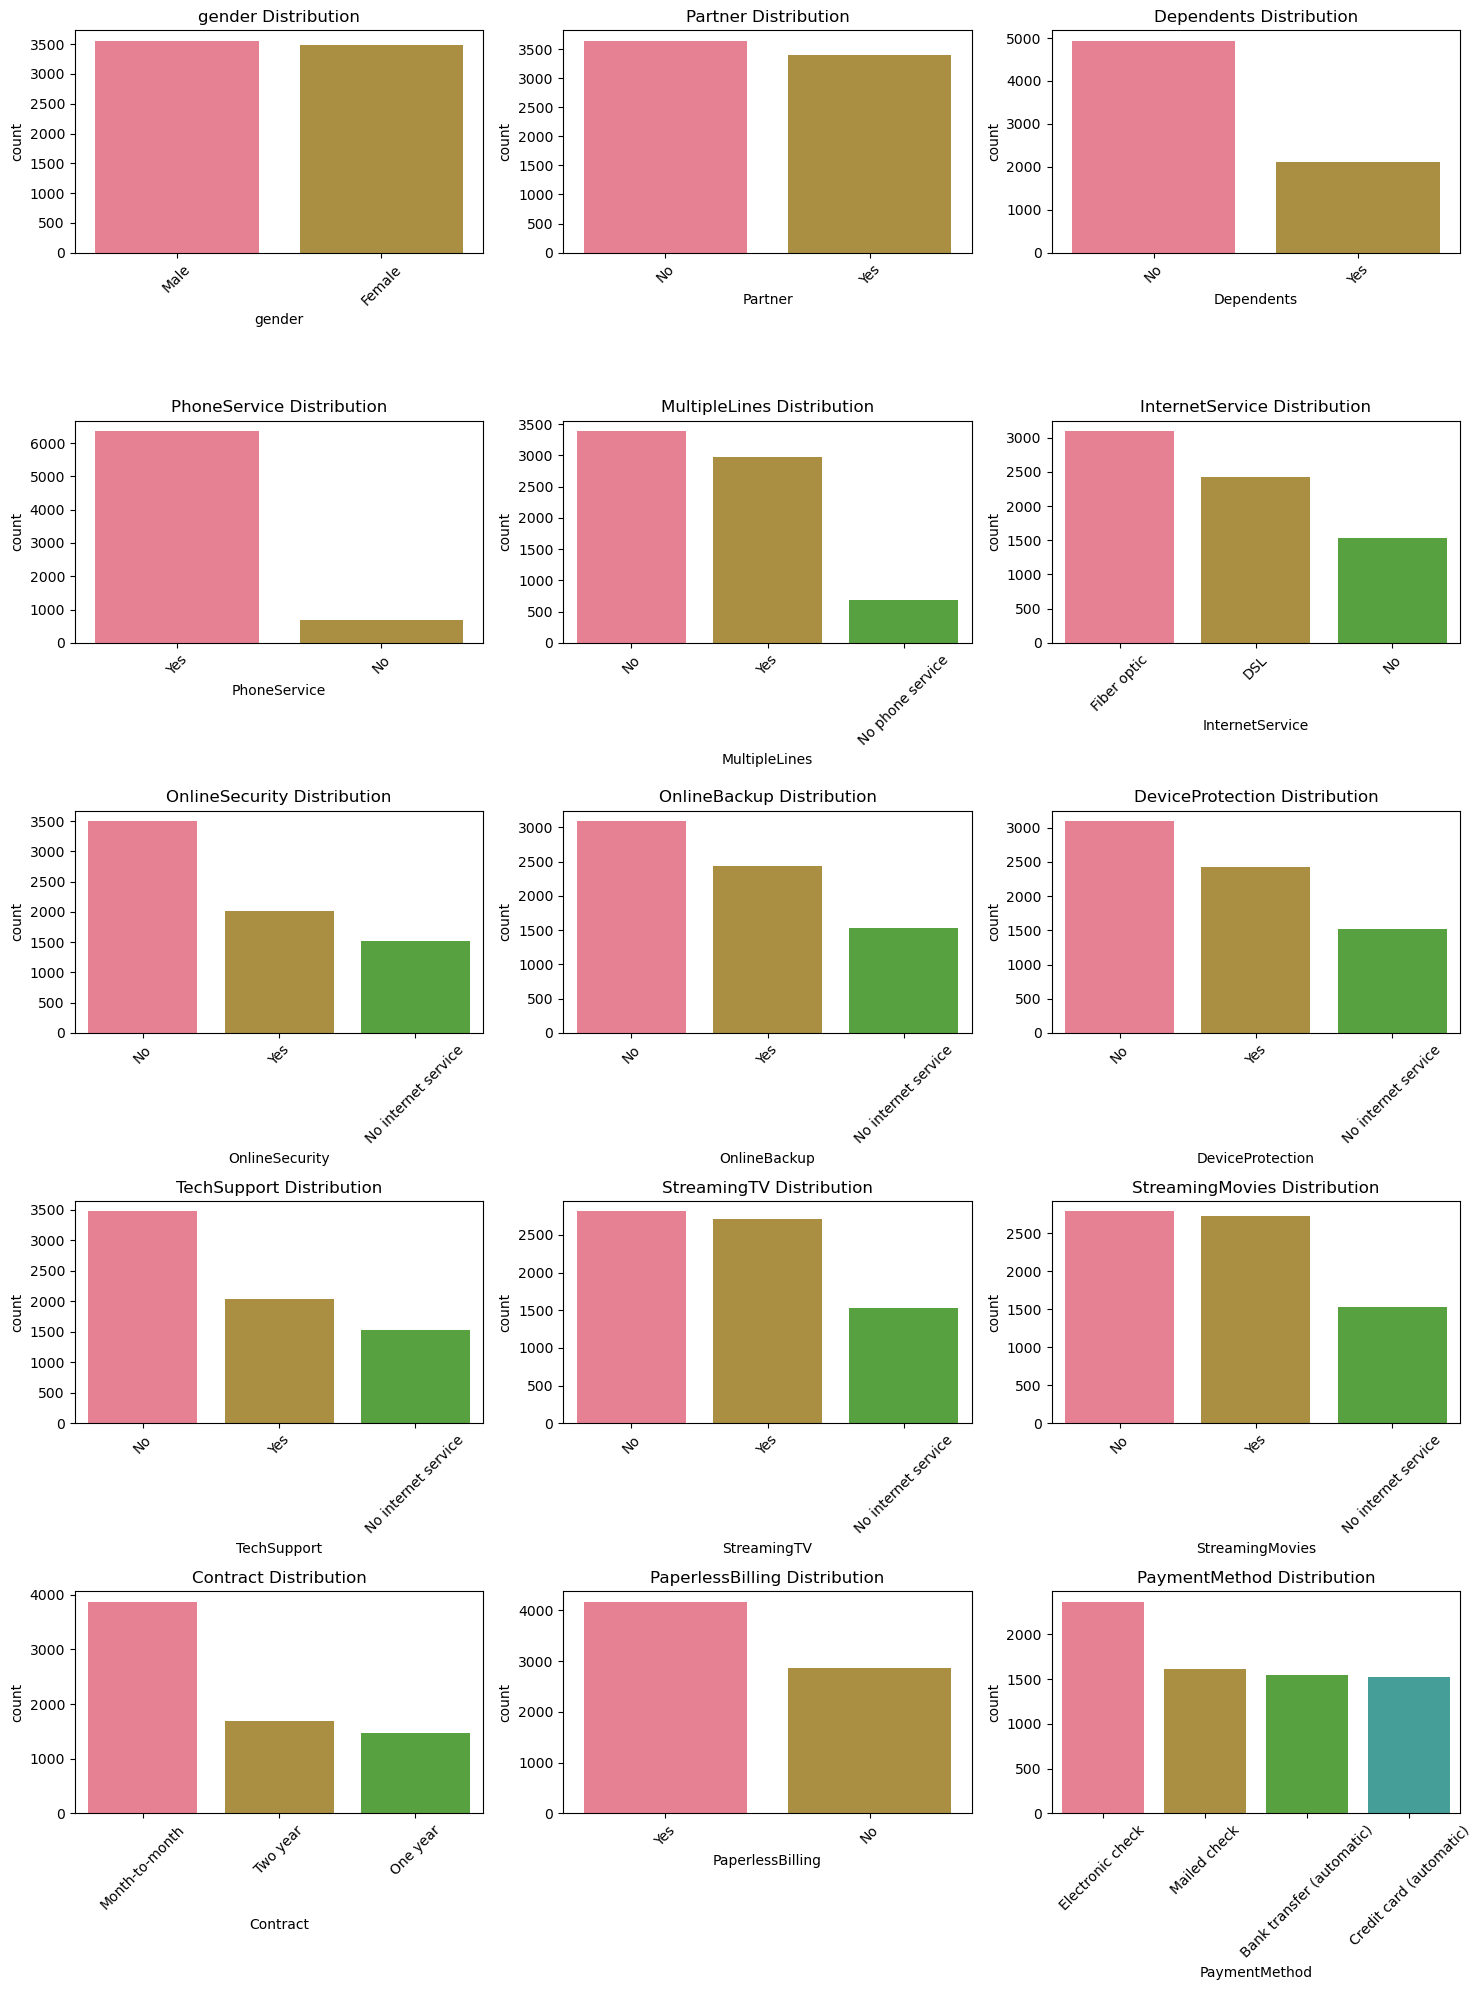

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_columns:
    categorical_columns.remove(target_col)

print(f"📝 CATEGORICAL FEATURES ({len(categorical_columns)})")
print("=" * 50)
print(categorical_columns)

if categorical_columns:
    # Analyze each categorical feature
    cat_summary = []
    for col in categorical_columns:
        unique_count = df[col].nunique()
        most_frequent = df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'
        most_frequent_count = df[col].value_counts().iloc[0] if unique_count > 0 else 0
        most_frequent_pct = (most_frequent_count / len(df)) * 100
        
        cat_summary.append({
            'Feature': col,
            'Unique_Values': unique_count,
            'Most_Frequent': most_frequent,
            'Most_Frequent_Count': most_frequent_count,
            'Most_Frequent_Pct': f'{most_frequent_pct:.1f}%'
        })
    
    cat_df = pd.DataFrame(cat_summary)
    display(cat_df)
    
    # Visualize top categorical features (with <= 10 categories)
    top_categorical = [col for col in categorical_columns if df[col].nunique() <= 10]
    if top_categorical:
        n_cols = min(3, len(top_categorical))
        n_rows = (len(top_categorical) + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
        
        for i, col in enumerate(top_categorical):
            if i < len(axes):
                value_counts = df[col].value_counts()
                sns.countplot(data=df, x=col, order=value_counts.index, ax=axes[i])
                axes[i].set_title(f'{col} Distribution')
                axes[i].tick_params(axis='x', rotation=45)
        
        for i in range(len(top_categorical), len(axes)):
            axes[i].set_visible(False)
        plt.tight_layout()
        plt.show()

7. 🔍 Target vs Features Analysis

🔍 CHURN vs NUMERICAL FEATURES


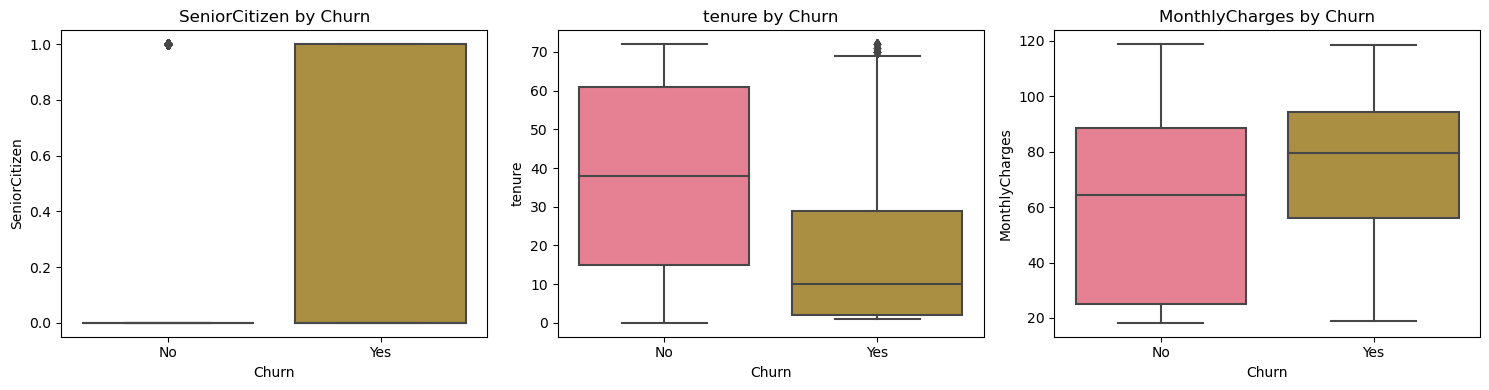


📊 NUMERICAL FEATURES BY TARGET


SeniorCitizen              tenure               MonthlyCharges         \
               mean median   std   mean median    std           mean median   
Churn                                                                         
No             0.13    0.0  0.33  37.57   38.0  24.11          61.27  64.43   
Yes            0.25    0.0  0.44  17.98   10.0  19.53          74.44  79.65   

              
         std  
Churn         
No     31.09  
Yes    24.67

📝 CHURN vs CATEGORICAL FEATURES

customerID - Churn Rate by Category:
  7812-FZHPE: 100.0% (n=1)
  3106-ULWFW: 100.0% (n=1)
  3186-BAXNB: 100.0% (n=1)
  7627-JKIAZ: 100.0% (n=1)
  3190-XFANI: 100.0% (n=1)

gender - Churn Rate by Category:
  Female: 26.9% (n=3488)
  Male: 26.2% (n=3555)

Partner - Churn Rate by Category:
  No: 33.0% (n=3641)
  Yes: 19.7% (n=3402)

Dependents - Churn Rate by Category:
  No: 31.3% (n=4933)
  Yes: 15.5% (n=2110)

PhoneService - Churn Rate by Category:
  Yes: 26.7% (n=6361)
  No: 24.9% (n=682)

MultipleLines - Churn Rate by Category:
  Yes: 28.6% (n=2971)
  No: 25.0% (n=3390)
  No phone service: 24.9% (n=682)


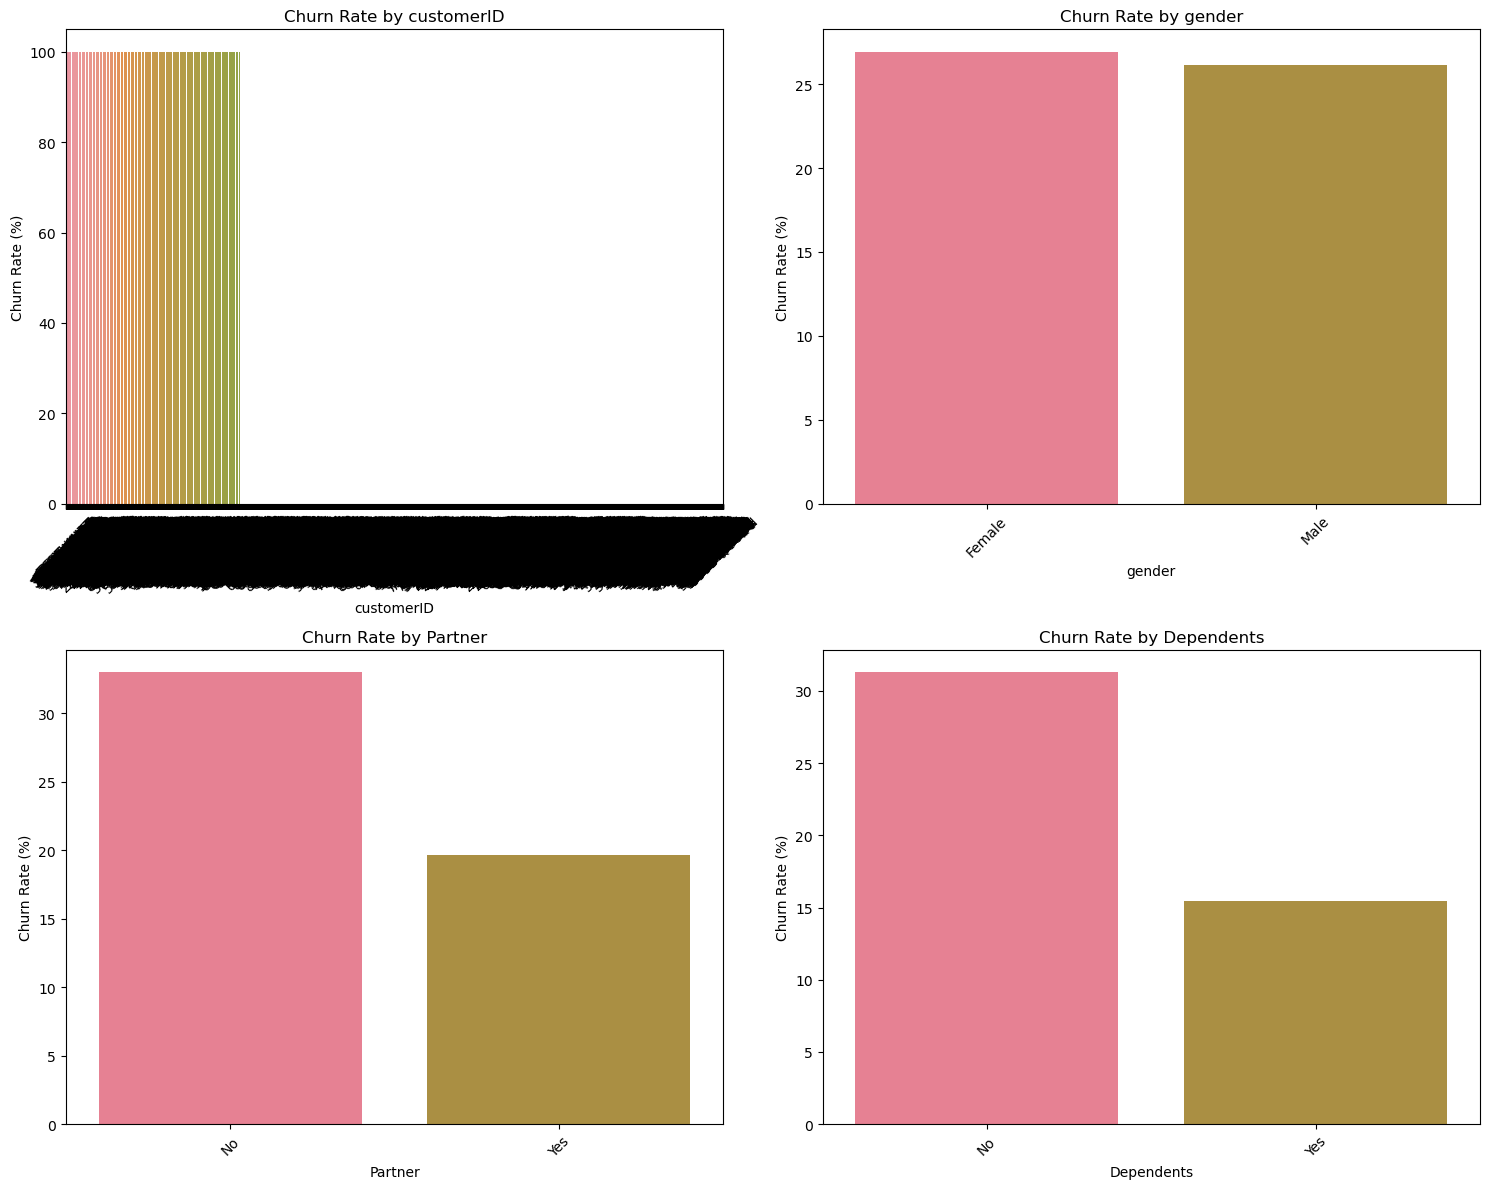

In [7]:
# Analyze relationship between features and target
if target_col in df.columns:
    print(f"🔍 {target_col.upper()} vs NUMERICAL FEATURES")
    print("=" * 50)
    
    # Numerical features vs target
    if numeric_columns:
        n_cols = min(3, len(numeric_columns))
        n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
        
        for i, col in enumerate(numeric_columns):
            if i < len(axes):
                sns.boxplot(data=df, x=target_col, y=col, ax=axes[i])
                axes[i].set_title(f'{col} by {target_col}')
        
        for i in range(len(numeric_columns), len(axes)):
            axes[i].set_visible(False)
        plt.tight_layout()
        plt.show()
    
    # Statistical summary by target
    if numeric_columns:
        print("\n📊 NUMERICAL FEATURES BY TARGET")
        print("=" * 50)
        summary_by_target = df.groupby(target_col)[numeric_columns].agg(['mean', 'median', 'std']).round(2)
        display(summary_by_target)

# Categorical features vs target
if target_col in df.columns and categorical_columns:
    print(f"📝 {target_col.upper()} vs CATEGORICAL FEATURES")
    print("=" * 50)
    
    # Calculate churn rate by categorical features (top 6)
    churn_rates = []
    for col in categorical_columns[:6]:
        cross_tab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        if 'Yes' in cross_tab.columns:
            churn_rate_by_category = cross_tab['Yes'].sort_values(ascending=False)
            
            print(f"\n{col} - Churn Rate by Category:")
            for category, rate in churn_rate_by_category.head().items():
                count = df[df[col] == category].shape[0]
                print(f"  {category}: {rate:.1f}% (n={count})")
            
            churn_rates.append((col, churn_rate_by_category))
    
    # Visualize churn rates
    if churn_rates:
        n_features = min(4, len(churn_rates))
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
        
        for i, (feature, rates) in enumerate(churn_rates[:n_features]):
            rates_df = rates.reset_index()
            rates_df.columns = [feature, 'Churn_Rate']
            sns.barplot(data=rates_df, x=feature, y='Churn_Rate', ax=axes[i])
            axes[i].set_title(f'Churn Rate by {feature}')
            axes[i].set_ylabel('Churn Rate (%)')
            axes[i].tick_params(axis='x', rotation=45)
        
        for i in range(n_features, len(axes)):
            axes[i].set_visible(False)
        plt.tight_layout()
        plt.show()

8. 💡 Key Insights and Recommendations

In [8]:
print("💡 KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 50)

insights = []
insights.append(f"📊 Dataset contains {df.shape[0]:,} customers with {df.shape[1]} features")

# Target variable insights
if target_col in df.columns:
    churn_rate = df[target_col].value_counts(normalize=True).get('Yes', 0) * 100
    if churn_rate > 0:
        churn_level = 'high' if churn_rate > 30 else 'moderate' if churn_rate > 15 else 'low'
        insights.append(f"🎯 Churn rate is {churn_rate:.1f}% - {churn_level} churn scenario")
    if churn_rate < 20 or churn_rate > 80:
        insights.append("⚖️  Dataset shows class imbalance - consider SMOTE or other balancing techniques")

# Missing values insights
missing_cols = df.isnull().sum()
if missing_cols.sum() == 0:
    insights.append("✅ No missing values detected - clean dataset")
else:
    insights.append(f"❌ {missing_cols[missing_cols > 0].shape[0]} columns have missing values - requires attention")

# High cardinality insights
high_cardinality_cols = [col for col in categorical_columns if df[col].nunique() > 20]
if high_cardinality_cols:
    insights.append(f"🏷️  High cardinality features detected: {high_cardinality_cols} - consider grouping")

# Numerical features insights
if numeric_columns:
    insights.append(f"🔢 {len(numeric_columns)} numerical features available for scaling and correlation analysis")

# Feature engineering opportunities
feature_opportunities = []
if 'tenure' in df.columns:
    feature_opportunities.append("tenure grouping (New/Short/Long-term customers)")
if 'MonthlyCharges' in df.columns and 'TotalCharges' in df.columns:
    feature_opportunities.append("charge ratios and spending patterns")
if any('Service' in col or 'Streaming' in col for col in df.columns):
    feature_opportunities.append("service bundle counts")

if feature_opportunities:
    insights.append(f"🔧 Feature engineering opportunities: {', '.join(feature_opportunities)}")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

print("\n🚀 NEXT STEPS:")
print("=" * 20)
print("1. Address any data quality issues identified")
print("2. Proceed to feature engineering (02_feature_engineering.ipynb)")
print("3. Consider class imbalance handling strategies")
print("4. Plan correlation analysis for feature selection")
print("5. Design customer segmentation based on insights")

💡 KEY INSIGHTS & RECOMMENDATIONS
 1. 📊 Dataset contains 7,043 customers with 21 features
 2. 🎯 Churn rate is 26.5% - moderate churn scenario
 3. ✅ No missing values detected - clean dataset
 4. 🏷️  High cardinality features detected: ['customerID', 'TotalCharges'] - consider grouping
 5. 🔢 3 numerical features available for scaling and correlation analysis
 6. 🔧 Feature engineering opportunities: tenure grouping (New/Short/Long-term customers), charge ratios and spending patterns, service bundle counts

🚀 NEXT STEPS:
1. Address any data quality issues identified
2. Proceed to feature engineering (02_feature_engineering.ipynb)
3. Consider class imbalance handling strategies
4. Plan correlation analysis for feature selection
5. Design customer segmentation based on insights


9. 📊 Interactive Visualizations

In [9]:
# Interactive churn analysis dashboard
if target_col in df.columns and len(categorical_columns) > 0:
    print("🎨 CREATING INTERACTIVE VISUALIZATIONS")
    print("=" * 50)
    
    # Interactive target distribution
    fig_target = px.pie(df, names=target_col, title='Customer Churn Distribution',
                       color_discrete_map={'No': 'lightblue', 'Yes': 'lightcoral'})
    fig_target.show()
    
    # Interactive correlation heatmap for numerical features
    if len(numeric_columns) > 1:
        corr_matrix = df[numeric_columns].corr()
        fig_corr = px.imshow(corr_matrix, 
                            title='Numerical Features Correlation Matrix',
                            color_continuous_scale='RdBu',
                            aspect='auto')
        fig_corr.show()
    
    # Interactive churn rate by top categorical features
    top_cat_features = [col for col in categorical_columns[:4] if df[col].nunique() <= 8]
    
    for col in top_cat_features:
        # Calculate churn rate by category
        churn_by_cat = df.groupby(col)[target_col].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
        churn_by_cat.columns = [col, 'Churn_Rate']
        
        # Add count information
        counts = df[col].value_counts().reset_index()
        counts.columns = [col, 'Count']
        
        plot_data = churn_by_cat.merge(counts, on=col)
        
        fig = px.bar(plot_data, x=col, y='Churn_Rate', 
                    hover_data=['Count'],
                    title=f'Churn Rate by {col}',
                    labels={'Churn_Rate': 'Churn Rate (%)'})
        fig.show()

🎨 CREATING INTERACTIVE VISUALIZATIONS


10. 💾 Save Exploration Results

In [10]:
# Save exploration summary
exploration_summary = {
    'dataset_shape': df.shape,
    'target_distribution': df[target_col].value_counts().to_dict() if target_col in df.columns else {},
    'missing_values': df.isnull().sum().to_dict(),
    'numerical_features': numeric_columns,
    'categorical_features': categorical_columns,
    'high_cardinality_features': [col for col in categorical_columns if df[col].nunique() > 20],
    'data_types': df.dtypes.astype(str).to_dict()
}

import json
import os

# Create results directory if it doesn't exist
os.makedirs('../results/reports', exist_ok=True)

# Save exploration summary
with open('../results/reports/data_exploration_summary.json', 'w') as f:
    json.dump(exploration_summary, f, indent=2)

print("💾 Exploration summary saved to: results/reports/data_exploration_summary.json")

# Save processed dataset info for next notebooks
dataset_info = {
    'total_samples': len(df),
    'total_features': len(df.columns),
    'target_column': target_col,
    'numerical_columns': numeric_columns,
    'categorical_columns': categorical_columns,
    'churn_rate': df[target_col].value_counts(normalize=True).get('Yes', 0) * 100 if target_col in df.columns else 0
}

with open('../data/interim/dataset_info.json', 'w') as f:
    json.dump(dataset_info, f, indent=2)

print("📊 Dataset info saved to: data/interim/dataset_info.json")
print("\n✅ Data exploration completed successfully!")
print("🔜 Next: Run notebooks/02_feature_engineering.ipynb")

💾 Exploration summary saved to: results/reports/data_exploration_summary.json
📊 Dataset info saved to: data/interim/dataset_info.json

✅ Data exploration completed successfully!
🔜 Next: Run notebooks/02_feature_engineering.ipynb
